Stability of Defection
----------------------

In [1]:
import opt_mo
import sympy as sym

In [2]:
import numpy as np
import itertools
import axelrod as axl

In [3]:
sym.init_printing()

In [4]:
p_1, p_2, p_3, p_4 = sym.symbols('p_1, p_2, p_3, p_4')
q_1, q_2, q_3, q_4 = sym.symbols('q_1, q_2, q_3, q_4')

In [5]:
p, q = (p_1, p_2, p_3, p_4), (q_1, q_2, q_3, q_4)

In [6]:
c_num = opt_mo.mem_linear_numerator(q)
c_den = opt_mo.mem_linear_denominator(q)

In [7]:
constant_num = opt_mo.mem_constant_numerator(q)
constant_den = opt_mo.mem_constant_denominator(q)

In [8]:
expr = c_num * constant_den - c_den * constant_num

In [9]:
expr = [expr.factor() for expr in expr]

In [10]:
matrix = sym.Matrix(expr)

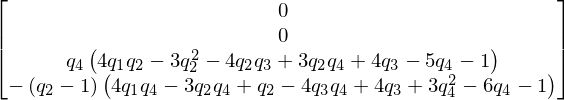

In [11]:
matrix

In [12]:
with open('../tex/defection_matrix.txt', 'w') as textfile:
    textfile.write(sym.latex(matrix))

In [13]:
with open('../tex/defection_condition_one.txt', 'w') as textfile:
    textfile.write(sym.latex(matrix[2]))

In [14]:
with open('../tex/defection_condition_two.txt', 'w') as textfile:
    textfile.write(sym.latex(matrix[3]))

In [ ]:
for x, y, z, u in itertools.combinations(np.linspace(0, 1, 100), 4):
    condition_one = sym.lambdify((q_1, q_2, q_3, q_4), expr[2])
    condition_two = sym.lambdify((q_1, q_2, q_3, q_4), expr[3])
    if condition_one(x, y, z, u) > 0 and condition_two(x, y, z, u) >= 0:
        print(x, y, z, u)

In [61]:
from fractions import Fraction
[Fraction('{}'.format(i)).limit_denominator(100) for i in [0.14792062434808473, 
                                              0.22829835699996648,
                                              0.8074933620503766,
                                              0.29847457554008316]]


[Fraction(13, 88), Fraction(21, 92), Fraction(21, 26), Fraction(20, 67)]

In [62]:
for x, y, z, u in [[3/10, 3/20, 13/20, 7/100], 
                   [17/20, 3/4, 2/3, 1/4], 
                   [11/25, 3/10, 9/10, 1/2], 
                   [13/88, 21/92, 21/26, 20/67]]:
    print(condition_one(x, y, z, u), condition_two(x, y, z, u))

0.07028000000000001 1.03292
-0.039583333333333415 0.18124999999999997
-0.136 -0.504
0.054853370618203924 -0.04408577621892863


In [57]:
for i in range(1000):
    axl.seed(i)
    x, y, z, u = np.random.random(4)
    if (condition_one(x, y, z, u) > 0) and condition_two(x, y, z, u) < 0:
        print(x, y, z, u)

0.14792062434808473 0.22829835699996648 0.8074933620503766 0.29847457554008316
0.07433086780644194 0.027945433698811972 0.7006664519688256 0.2762637388709063
0.38045297748481355 0.16267662635491698 0.6731275274644691 0.27228540842425386
0.08953424929144593 0.07865189505426873 0.8183489496771018 0.3847794366100209
0.41946043939387 0.17104314143466204 0.7579267618630342 0.3358655328729947
